# Exercise 00: Subspace Analysis

## Load libraries

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme="grade3", ticks=True, grid=False, figsize=(12, 8))

In [30]:
import hoggorm as ho
import hoggormplot as hopl
import pandas as pd

## Import Data

In [3]:
aj_df = pd.read_table("AppleJuice_consumer.txt", sep='\t', index_col=0)
aj_df_data = aj_df.values

## Fit a PCA model

In [34]:
aj_model = ho.nipalsPCA(arrX = aj_df_data,
                        numComp = 8,
                        Xstand = False,
                        cvType = ["loo"])

loo


## Assignment Questions

### Do you think the variables should be centred or standardised? Why would you make this choice?

I think the variables need not to be scaled (standardised) since all the values are in the same scale from 1 to 7.

### What is the maximum number of components you could compute for the data at hand?

Since the dimension of our data is 6 (rows) by 125 (columns), the maximum number of components we can compute for the data is minimum of 6 and 125, i.e. 6.

### Generate these plots with HoggormPlot:

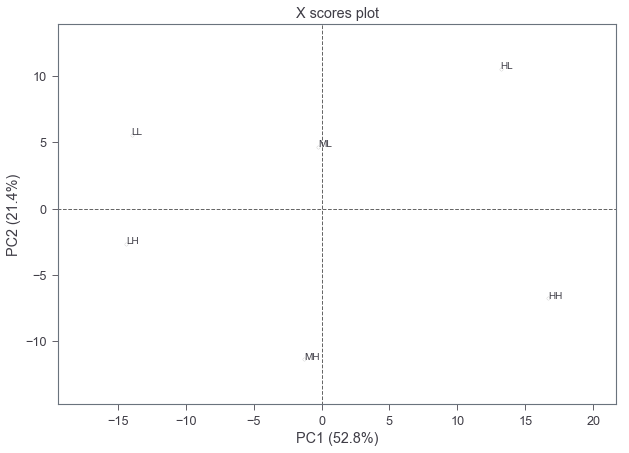

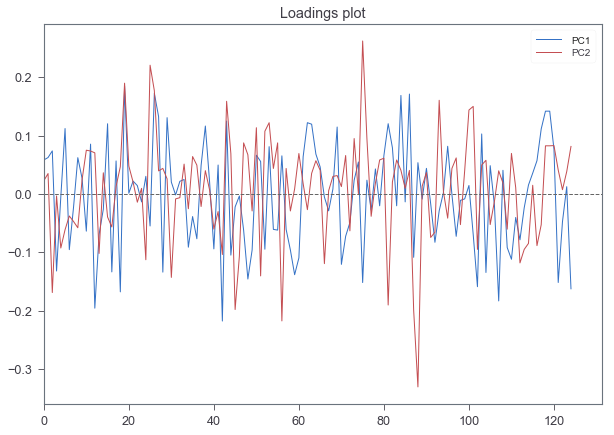

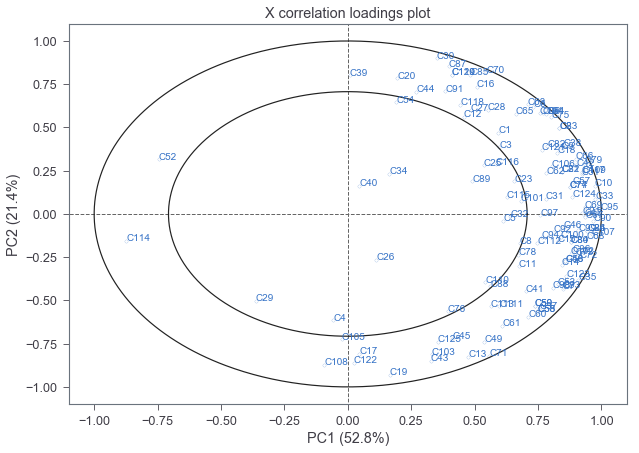

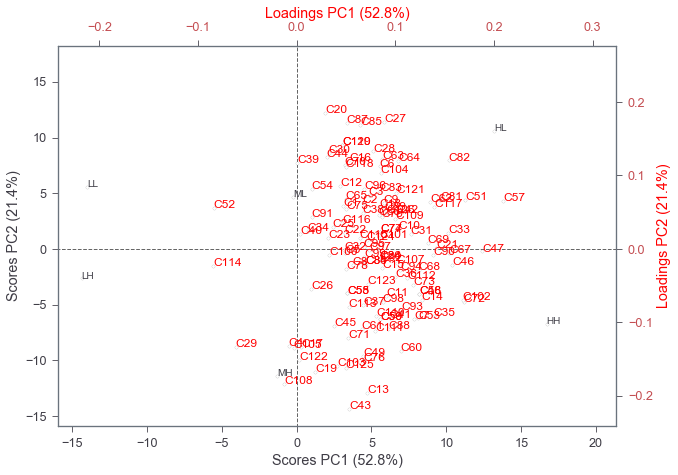

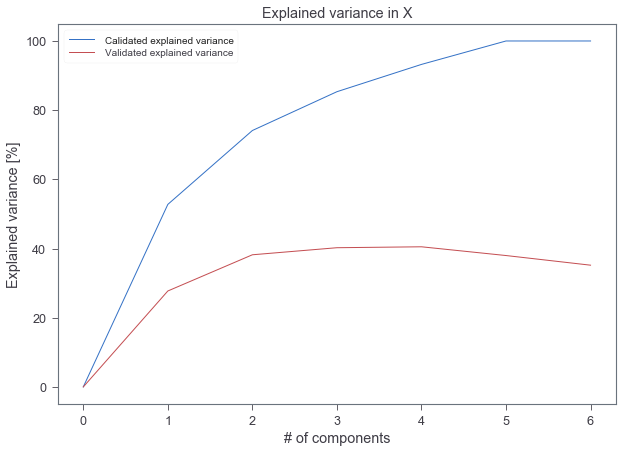

In [35]:
f = hopl.plot(aj_model, comp=[1, 2], plots=[1, 2, 3, 4, 6], objNames=list(aj_df.index), XvarNames=list(aj_df.columns), line = True, figsize = (10, 7))

None


In [44]:
def get_hoggplot(type, figsize=None):
    hopl.plot(aj_model,
              comp = [1, 2],
              plots = type,
              objNames = list(aj_df.index),
              XvarNames = list(aj_df.columns),
              line = True,
              figsize = figsize,
              which=["X"]
    )

#### Score Plot

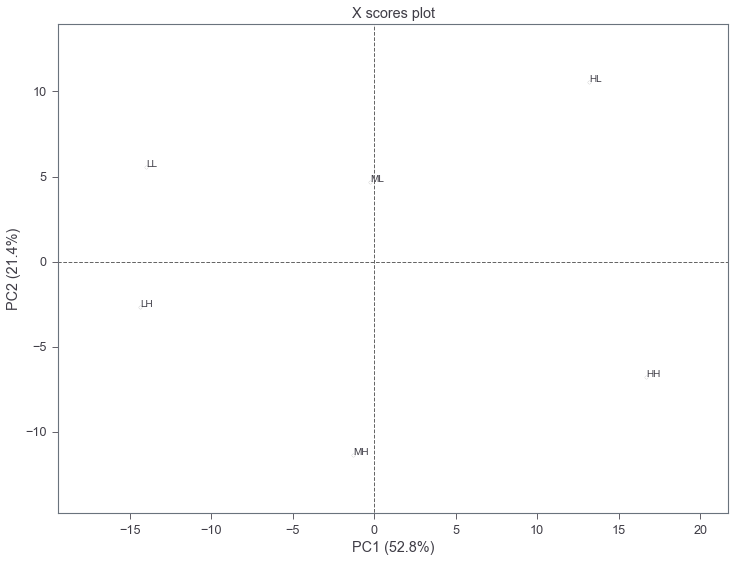

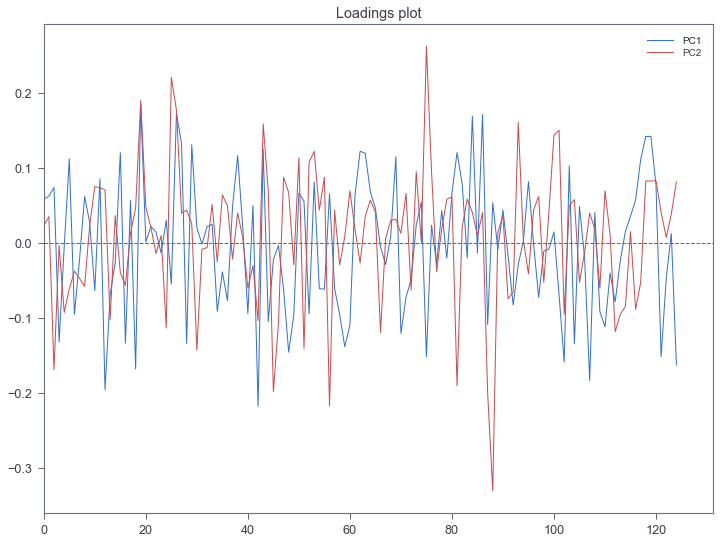

In [46]:
pl = get_hoggplot(["scores", "loadings"], figsize=(12, 9))

#### Loading Plot

In [47]:
pl

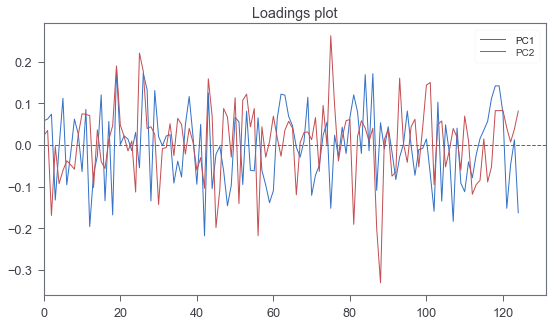

In [11]:
get_hoggplot(["loadings"], figsize=(9, 5))

#### Explained Variance Plot

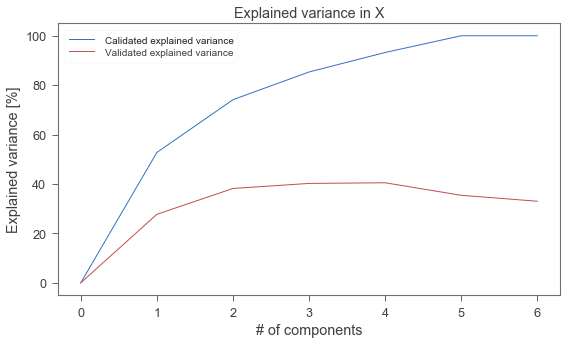

In [12]:
get_hoggplot(["explainedVariance"], figsize=(9, 5))

#### Biplot

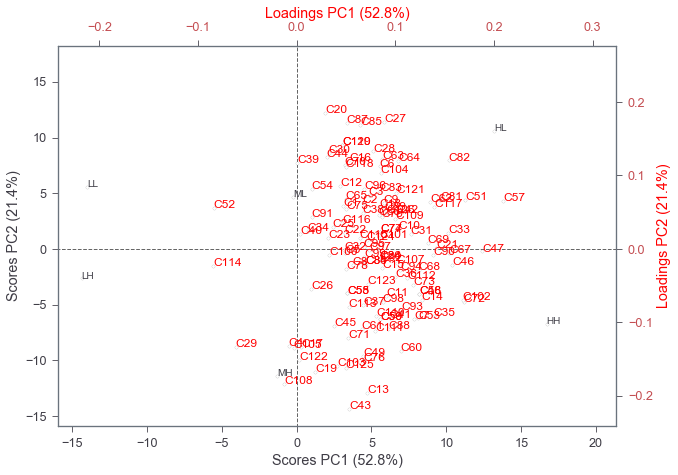

In [14]:
get_hoggplot(["biplot"], figsize=(10, 7))

#### Correlation Loadings

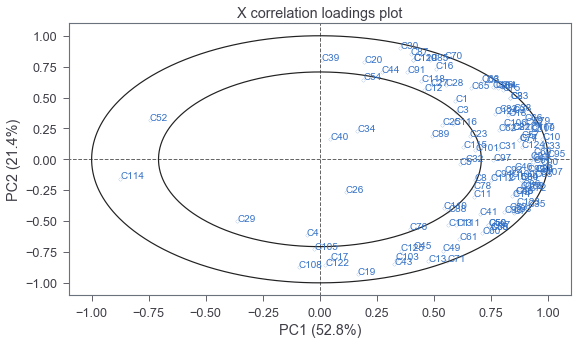

In [15]:
get_hoggplot(["correlationLoadings"], figsize=(9, 5))

### How many components would you use for interpretation of the PCA model?

Based on the cross-validated curve in explained variation plot, I would select two components. Since two components explained almost 40% of the variation present in X. After the second component, the explained variation gets stationary and even starts decreasing after fourth component.

### Based on what you see in the score plot, what do you think component 1 represents? What do you think component 2 represents?

Looking at the score plot, the first component separates the acid level and the second component separates the sugar level in the apple juices.

### Which products do most of the consumers prefer?

Looking at the biplot we see that most of the customers are on right hand side of the first component together with medium to high sugar level. This indicates that most of the customers  prefer medium to high sugar level in the apple juice.

### Why are consumers C26, C34 and C40 close to the origin in the correlation loadings plot?

The correlation loading plot shows the correlation between the X variables and the loadings. From the plot we see that consumers C26, C34 and C40 are close to the origin indicating that they are less correlated with any of the loading from first and second principal components. This indicates that these customers are invariant to the acid and sugar level in the apple juice. These customers gave low points to all the apple juice they have tasted. 

### How much of the total variance do component 1 and component 2 explain together?

In [24]:
aj_model.X_cumValExplVar()[0:3]

[0.0, 27.728766165162455, 38.193643777254181]

About 38.194% of variance is explained by component 1 and component 2 explain together in the fitted PCA model.

### How would you extract the scores $T$ and loadings $P$ from the computed PCA model (study the Hoggorm documentation)?

In [25]:
T = pd.DataFrame(aj_model.X_scores(),
                 columns = ["Comp" + str(i) for i in range(1, 7)],
                 index = aj_df.index)
P = pd.DataFrame(aj_model.X_loadings(),
                 columns = ["Comp" + str(i) for i in range(1, 7)],
                 index = aj_df.columns)
print("Scores:")
print(T)
print("\nLoadings:")
print(P.head())

Scores:
            Comp1      Comp2      Comp3     Comp4     Comp5         Comp6
Sample                                                                   
LL     -13.981711   5.573705  -1.034554  0.541467 -7.470227 -2.417062e-15
ML      -0.242272   4.677502  10.302775 -4.087288  2.502949 -1.402090e-15
HL      13.195944  10.557047  -3.608539  4.874128  2.385939 -1.569750e-15
LH     -14.371048  -2.654712  -6.296110 -2.923578  5.623705 -2.257847e-15
MH      -1.296810 -11.376322   3.638036  7.024382  0.206267 -1.792163e-15
HH      16.695897  -6.777220  -3.001608 -5.429113 -3.248633 -1.774374e-15

Loadings:
       Comp1     Comp2     Comp3     Comp4     Comp5     Comp6
C1  0.046847  0.058299  0.022624  0.039960  0.134066  0.100028
C2  0.066792  0.062484  0.035032  0.024629 -0.014525 -0.038900
C3  0.073099  0.073919 -0.169110 -0.086416 -0.042197 -0.082544
C4 -0.007882 -0.132157 -0.003371  0.207486  0.199382  0.047107
C5  0.049067 -0.004951 -0.092702  0.120439 -0.007031 -0.020453


### How would you extract the settings under which the PCA model was computed?

In [26]:
aj_model.modelSettings();